# **ESTI019 - 3QS2021 - CSM - Minami**
# **Lab3 - Codificação de Imagem por DCT e Animação**

<h2> Objetivos: </h2>

1.   Produzir um vídeo de animação para o Grupo com Blender
2.   Efetuar conversões entre espaços de cores
3.   Comparar arquivos comprimidos JPEG
4.   Efetuar compressão de imagem com DCT








# 1. *Produzir um vídeo de animação para o Grupo com Blender*

Vejam o vídeo de como efetuar uma animação básica usando o Blender (instalação recomendada 2.8):


https://youtu.be/xz4t1j2-1gs



# 2. *Efetuar conversões entre espaços de cores*

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
import shutil

dirGit = Path('/content/dwm-multimidia.github.io/')
if dirGit.exists():
  shutil.rmtree(dirGit)

!git clone https://github.com/dwm-multimidia/dwm-multimidia.github.io.git

dirLab3 = dirGit.joinpath('lab3/jupyter/')
print('\nAgora temos acesso aos arquivos:\n\t', '\n\t '.join([str(arquivo) for arquivo in dirLab3.iterdir()]))

Cloning into 'dwm-multimidia.github.io'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 270 (delta 124), reused 187 (delta 58), pack-reused 0
Receiving objects: 100% (270/270), 57.42 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (124/124), done.

Agora temos acesso aos arquivos:
	 /content/dwm-multimidia.github.io/lab3/jupyter/messi5.jpg
	 /content/dwm-multimidia.github.io/lab3/jupyter/lena.bmp
	 /content/dwm-multimidia.github.io/lab3/jupyter/Lab3_Cod_Imagem_por_DCT_e_Animacao_v2.ipynb


In [5]:
bgr1 = cv.imread(str(dirLab3 / 'messi5.jpg')) # leitura no formato BGR!
altura, largura, camadas = bgr1.shape
print("Resolução: ", largura, " x ", altura, "PIXELS. ", camadas, " camadas.")

Resolução:  548  x  342 PIXELS.  3  camadas.


Separa os canais e re-arranja para formar imagem RGB

In [6]:
b1, g1, r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])
# Q1 - O que foi feito aqui?

Imprime cores trocadas (BGR) e reais (RGB) 

Text(0.5, 1.0, 'RBG')

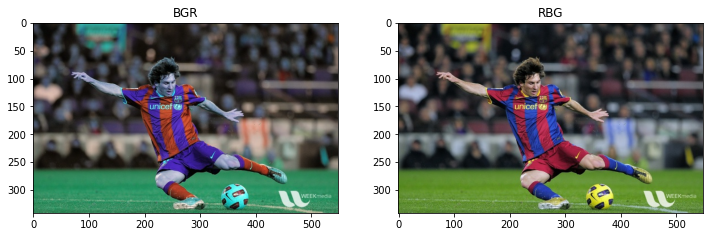

In [7]:
plt.figure(figsize=[12, 5])
plt.subplot(121); plt.imshow(bgr1); plt.title('BGR')
plt.subplot(122); plt.imshow(rgb2); plt.title('RBG')

Converte para os formatos YCrCb e HSV

Text(0.5, 1.0, 'HSV')

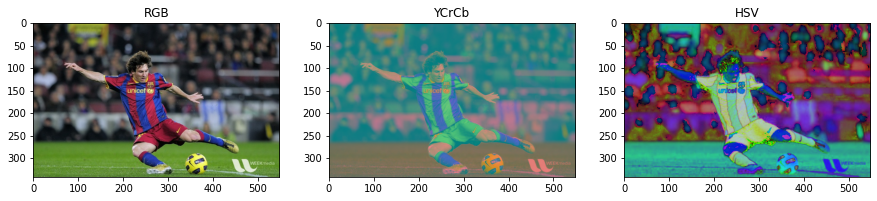

In [8]:
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)
plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb2); plt.title('RGB')
plt.subplot(132); plt.imshow(ycrcb); plt.title('YCrCb')
plt.subplot(133); plt.imshow(hsv); plt.title('HSV')

Separação das Camadas RGB individualmente

Text(0.5, 1.0, 'RGB_Camada B')

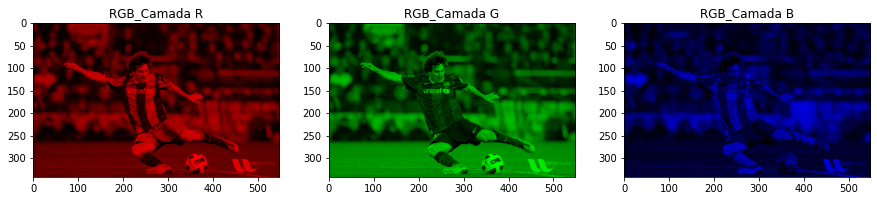

In [9]:
imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
imageG = rgb2.copy()
imageG[:, :, 0] = 0; imageG[:, :, 2] = 0
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0     
# Q2 - O que foi feito aqui?

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(imageR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(imageG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(imageB); plt.title('RGB_Camada B')

Separação dos Canais YCbCr

Text(0.5, 1.0, 'YCrCb_Cb')

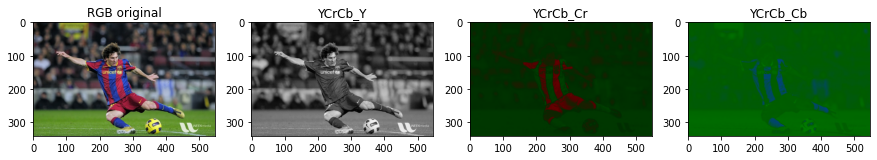

In [10]:
y1, cr1, cb1 = cv.split(ycrcb)
imageCR = ycrcb.copy()
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr = cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb = cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgb2); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(Cr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(Cb); plt.title('YCrCb_Cb')


# Com as Imagens do Grupo:


1.   Faça o mesmo com uma imagem de cada integrante do grupo e
2.   Com a foto montagem de todos os do grupo, lembrando das roupas com cores diferentes, preferencialmente (R, G e B).



********************************************************************************

# 3. *Comparar arquivos comprimidos JPEG*
*COMPRESSÃO DE IMAGENS COM PERDAS*

================================================================================


*   O formato JPEG permite compressão da imagem ao salvá-la num arquivo com o comando imwrite().

*   A compressão afeta a qualidade da imagem, sendo controlada pelo parâmetro IMWRITE_JPEG_QUALITY entre 0-100, sendo que quanto maior, melhor a qualidade. O default é 95.




Text(0.5, 1.0, 'JPEG fator 05')

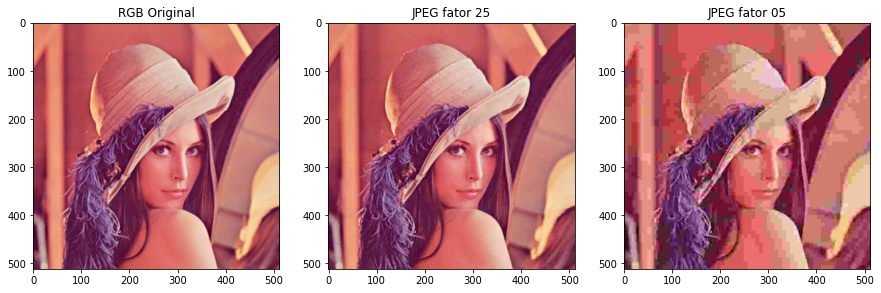

In [14]:
bgr = cv.imread(str(dirLab3 / 'lena.bmp'))  # formato BGR

# salva com menor qualidade, fatores 25 e 5
cv.imwrite('lena25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('lena05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# leitura para visualização e conversão para acertar a cor
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
bgr25 = cv.imread('lena25.jpg'); rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
bgr05 = cv.imread('lena05.jpg'); rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb); plt.title('RGB Original')
plt.subplot(132); plt.imshow(rgb25); plt.title('JPEG fator 25')
plt.subplot(133); plt.imshow(rgb05); plt.title('JPEG fator 05')

# COM AS FOTOS DO GRUPO


1.   Repita o procedimento para cada uma das fotos dos integrantes do grupo e para a foto-montagem do grupo todo
2.   Leia o tamanho dos arquivos (em bytes) e faça uma tabela comparando os tamanhos originais e os comprimidos e calcule a porcentagem de compressão de cada arquivo destes tamanhos na tabela construída



********************************************************************************
# TRANSFORMADA DISCRETA COSSENO
********************************************************************************

# *4. Efetuar compressão de imagem com DCT*

Nesta parte calcule a DCT em bloco de 8x8 da imagem, referente à bola

In [16]:
img = cv.imread(str(dirLab3 / 'messi5.jpg'))
alt, larg, cam = img.shape

ycbcr = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

bola = y[280:340, 330:390]
h, w = bola.shape

cx = round(w/2)
cy = round(h/2)

# Escolhendo um pedaço da imagem "BOLA"
bloco8x8 = bola[cx-4:cx+4, cy-4:cy+4]
print("(1)"); print("Matriz 8x8: componente Y original")
print(bloco8x8)

bloco8x8f = np.float32(bloco8x8)/255.0  # conversão para float
dct8x8f = cv.dct(bloco8x8f)   # calcula a DCT
dct8x8 = np.int64( (dct8x8f*255.0)) # coversão para inteiro

print("(2)"); print("Imagem Y 8x8 (formato ponto flutuante)")
print( np.around(bloco8x8f, decimals = 2) )

print("(3)"); print("DCT de Y (ponto flutuante)")
print( np.around(dct8x8f, decimals = 2) )

print("(4)"); print("DCT de Y (formato inteiro)")
print(dct8x8)



(1)
Matriz 8x8: componente Y original
[[216 224 158  56  69  67  60 111]
 [212 218 101  51 137 181 195 190]
 [207 220  80  65 194 244 247 235]
 [208 215 100 126 105 197 221 195]
 [210 215 154 159  93 112 152 176]
 [198 213 213 106  96  92  83  61]
 [192 209 215 170  32  21  64  70]
 [225 195 209 220 211 117  72 152]]
(2)
Imagem Y 8x8 (formato ponto flutuante)
[[0.85 0.88 0.62 0.22 0.27 0.26 0.24 0.44]
 [0.83 0.85 0.4  0.2  0.54 0.71 0.76 0.75]
 [0.81 0.86 0.31 0.25 0.76 0.96 0.97 0.92]
 [0.82 0.84 0.39 0.49 0.41 0.77 0.87 0.76]
 [0.82 0.84 0.6  0.62 0.36 0.44 0.6  0.69]
 [0.78 0.84 0.84 0.42 0.38 0.36 0.33 0.24]
 [0.75 0.82 0.84 0.67 0.13 0.08 0.25 0.27]
 [0.88 0.76 0.82 0.86 0.83 0.46 0.28 0.6 ]]
(3)
DCT de Y (ponto flutuante)
[[ 4.81  0.76  0.76  0.05 -0.15 -0.2  -0.09 -0.07]
 [ 0.06 -0.56  0.52  0.47 -0.21 -0.24 -0.09  0.  ]
 [-0.26  0.47 -0.2  -0.19  0.18 -0.12  0.14  0.14]
 [-0.63  0.67  0.   -0.36 -0.14  0.11  0.1   0.06]
 [ 0.09  0.07 -0.05 -0.12  0.22  0.03  0.02 -0.1 ]
 [-0.27

ZERANDO manualmente da diagonal da DCT as componentes AC

In [17]:
dct8x8fz = dct8x8f.copy()
dct8x8fz[0,7] = 0
dct8x8fz[1,6:8] = 0
dct8x8fz[2,5:8] = 0
dct8x8fz[3,4:8] = 0
dct8x8fz[4,3:8] = 0
dct8x8fz[5,2:8] = 0
dct8x8fz[6,1:8] = 0
dct8x8fz[7,0:8] = 0
print( np.around(dct8x8fz, decimals = 2))


[[ 4.81  0.76  0.76  0.05 -0.15 -0.2  -0.09  0.  ]
 [ 0.06 -0.56  0.52  0.47 -0.21 -0.24  0.    0.  ]
 [-0.26  0.47 -0.2  -0.19  0.18  0.    0.    0.  ]
 [-0.63  0.67  0.   -0.36  0.    0.    0.    0.  ]
 [ 0.09  0.07 -0.05  0.    0.    0.    0.    0.  ]
 [-0.27  0.19  0.    0.    0.    0.    0.    0.  ]
 [ 0.12  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


Bloco Original e Reconstruído com Zeros das componentes AC da diagonal para baixo zerados

Text(0.5, 1.0, 'Bloco Reconstruído com Zeros')

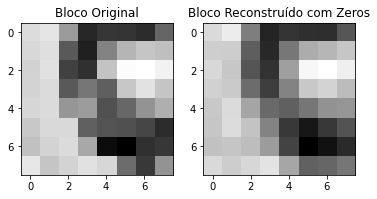

In [18]:
bloco8x8recz = cv.idct(dct8x8fz)

plt.subplot(121); plt.imshow(bloco8x8,'gray'); plt.title('Bloco Original')
plt.subplot(122); plt.imshow(bloco8x8recz,'gray'); plt.title('Bloco Reconstruído com Zeros')


# Escolha outro bloco de 8x8 da imagem e:
 

1.   refaça este procedimento zerando mais DUAS DIAGONAIS ACIMA DA PRINCIPAL além destas
2.   Compare e comente as imagens do bloco original e reconstruída


                                                   -X-X-X-










